# Analiza głównych składowych

Zbiór danych: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

Cel biznesowy: 
- Identyfikacja niezadowolonych klientów z lotu.
- Aktywna kampania dla niezadowolonych klientów, w celu zachęcenia do ponownego skorzystania z usług.


Etapy demo:
1. Załadowanie wymaganych bibliotek
2. Wczytanie i przegląd danych
3. Standaryzacja
4. Analiza głównych składowych
5. Porównanie modelu drzewa decyzyjnego na podstawie PCA i zmiennych surowych

### 1. Załadowanie wymaganych bibliotek

In [26]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.tree import plot_tree
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 2. Wczytanie i przegląd danych

In [27]:
df = pd.read_csv('data/flight_satisfaction.csv')
del df['Unnamed: 0']

In [28]:
# nagłówek
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.000,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.000,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.000,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.000,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.000,1,0,0,0,0,1


In [29]:
# liczebność zmiennej celu
df['satisfaction_satisfied'].value_counts()

satisfaction_satisfied
0    58879
1    45025
Name: count, dtype: int64

In [30]:
# przypisanie targetu do zmiennej
y = df['satisfaction_satisfied']
del df['satisfaction_satisfied']

### 3. Standaryzacja

In [31]:
df_scaled  = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745,-0.732,0.204,0.616,0.174,-1.547,1.352,-0.186,1.183,1.232,...,0.550,1.156,1.306,0.266,0.074,1.015,-0.473,1.491,-0.904,3.587
1,-0.951,-0.957,0.204,-0.695,0.174,0.018,-1.656,-0.186,-1.849,-1.769,...,-1.821,0.306,-1.742,-0.361,-0.236,1.015,2.115,-0.671,-0.904,-0.279
2,-0.885,-0.048,-0.550,-0.695,-0.541,-0.765,1.352,1.296,1.183,1.232,...,0.550,0.306,1.306,-0.388,-0.392,-0.985,-0.473,-0.671,-0.904,-0.279
3,-0.951,-0.629,-0.550,1.272,1.603,1.584,-0.904,-0.927,-1.091,-1.019,...,-1.821,0.306,-0.980,-0.100,-0.159,-0.985,-0.473,-0.671,-0.904,-0.279
4,1.430,-0.978,0.204,-0.040,0.174,0.018,0.600,1.296,1.183,-0.269,...,-0.240,-0.545,-0.218,-0.388,-0.392,1.015,-0.473,-0.671,-0.904,-0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.084,-1.000,-0.550,-1.351,-0.541,0.018,-0.904,-0.927,-1.091,-1.019,...,-1.031,-0.545,-0.980,-0.309,-0.392,-0.985,2.115,-0.671,1.106,-0.279
103900,0.636,1.161,0.957,0.616,0.889,0.801,-0.904,0.555,1.183,1.232,...,1.340,1.156,0.544,-0.388,-0.392,1.015,-0.473,-0.671,-0.904,-0.279
103901,-0.621,0.808,-1.303,-1.351,-1.256,0.018,0.600,-1.668,1.183,0.482,...,1.340,1.156,0.544,-0.204,-0.029,1.015,2.115,-0.671,-0.904,-0.279
103902,-1.150,-0.190,-1.303,-1.351,-1.256,1.584,-1.656,-1.668,-1.849,-1.769,...,1.340,0.306,-1.742,-0.388,-0.392,-0.985,2.115,-0.671,1.106,-0.279


In [32]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
count,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,...,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000
mean,39.380,1189.448,2.730,3.060,2.757,2.977,3.202,3.250,3.439,3.358,...,3.304,3.640,3.286,14.816,15.133,0.493,0.183,0.310,0.450,0.072
std,15.115,997.147,1.328,1.525,1.399,1.278,1.330,1.350,1.319,1.333,...,1.265,1.176,1.312,38.231,38.650,0.500,0.386,0.463,0.497,0.259
min,7.000,31.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,27.000,414.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,...,3.000,3.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,40.000,843.000,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,...,3.000,4.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,51.000,1743.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,4.000,...,4.000,5.000,4.000,12.000,13.000,1.000,0.000,1.000,1.000,0.000
max,85.000,4983.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,...,5.000,5.000,5.000,1592.000,1584.000,1.000,1.000,1.000,1.000,1.000


In [33]:
# Sprawdzenie wyników standaryzacji
df_scaled.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
count,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,...,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000,103904.000
mean,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.142,-1.162,-2.056,-2.007,-1.971,-2.330,-2.408,-2.409,-2.607,-2.519,...,-2.611,-3.097,-2.504,-0.388,-0.392,-0.985,-0.473,-0.671,-0.904,-0.279
25%,-0.819,-0.778,-0.550,-0.695,-0.541,-0.765,-0.904,-0.927,-1.091,-1.019,...,-0.240,-0.545,-0.980,-0.388,-0.392,-0.985,-0.473,-0.671,-0.904,-0.279
50%,0.041,-0.347,0.204,-0.040,0.174,0.018,-0.152,-0.186,0.425,0.482,...,-0.240,0.306,-0.218,-0.388,-0.392,-0.985,-0.473,-0.671,-0.904,-0.279
75%,0.769,0.555,0.957,0.616,0.889,0.801,0.600,0.555,1.183,0.482,...,0.550,1.156,0.544,-0.074,-0.055,1.015,-0.473,1.491,1.106,-0.279
max,3.018,3.804,1.710,1.272,1.603,1.584,1.352,1.296,1.183,1.232,...,1.340,1.156,1.306,41.254,40.592,1.015,2.115,1.491,1.106,3.587


## 4. Analiza Głównych składowych (PCA)

In [34]:
# model PCA
pca  = PCA().fit(df_scaled)

In [35]:
pca.explained_variance_ratio_

array([0.1765848 , 0.10313037, 0.09580613, 0.08536439, 0.07796676,
       0.06547792, 0.05011761, 0.04418733, 0.04153197, 0.04046599,
       0.03563795, 0.03006951, 0.02099958, 0.02094214, 0.01958624,
       0.01796329, 0.01596313, 0.01393883, 0.01281444, 0.01177977,
       0.01033124, 0.00761391, 0.00172669])

In [36]:
import numpy as np

In [37]:
np.sum(pca.explained_variance_ratio_)

1.0

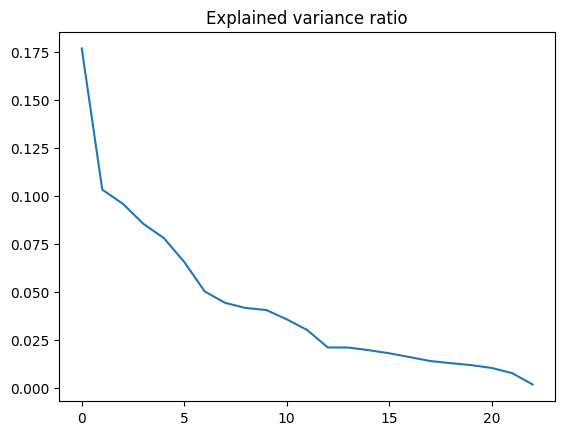

In [38]:
# Wizualizacja
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance ratio')
plt.show()

In [39]:
# Zbiór PCA
cols =  ['V'+str(i) for i in range(len(df_scaled.columns))]
df_pca = pd.DataFrame(pca.transform(df_scaled),columns=cols)

In [40]:
# Nagłówek
df_pca.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22
0,1.813,-0.988,-0.293,-0.037,2.001,-0.434,4.035,0.089,1.476,0.859,...,0.279,0.490,-0.120,0.595,-0.225,0.498,0.341,0.369,-0.030,-0.134
1,-3.106,0.867,1.541,-0.097,-2.151,2.108,0.294,1.039,0.764,-1.011,...,-0.905,0.921,-0.246,0.823,0.755,-0.188,0.647,-0.795,0.194,0.091
2,2.372,-1.895,-1.017,-0.436,-0.100,0.479,0.084,-1.075,-0.187,0.513,...,0.171,0.262,0.450,-0.032,0.275,-0.251,-0.127,0.140,0.077,-0.004
3,-1.537,2.354,0.841,-0.046,-0.976,0.492,0.735,0.215,-2.097,-0.672,...,-0.186,1.157,0.728,0.718,0.233,-0.108,0.626,0.697,-0.145,-0.047
4,1.107,0.236,-0.949,-0.413,-0.854,-0.498,-0.272,0.567,1.340,-0.897,...,-0.322,0.760,0.144,-0.562,0.736,0.640,-0.137,-0.172,-0.194,-0.001


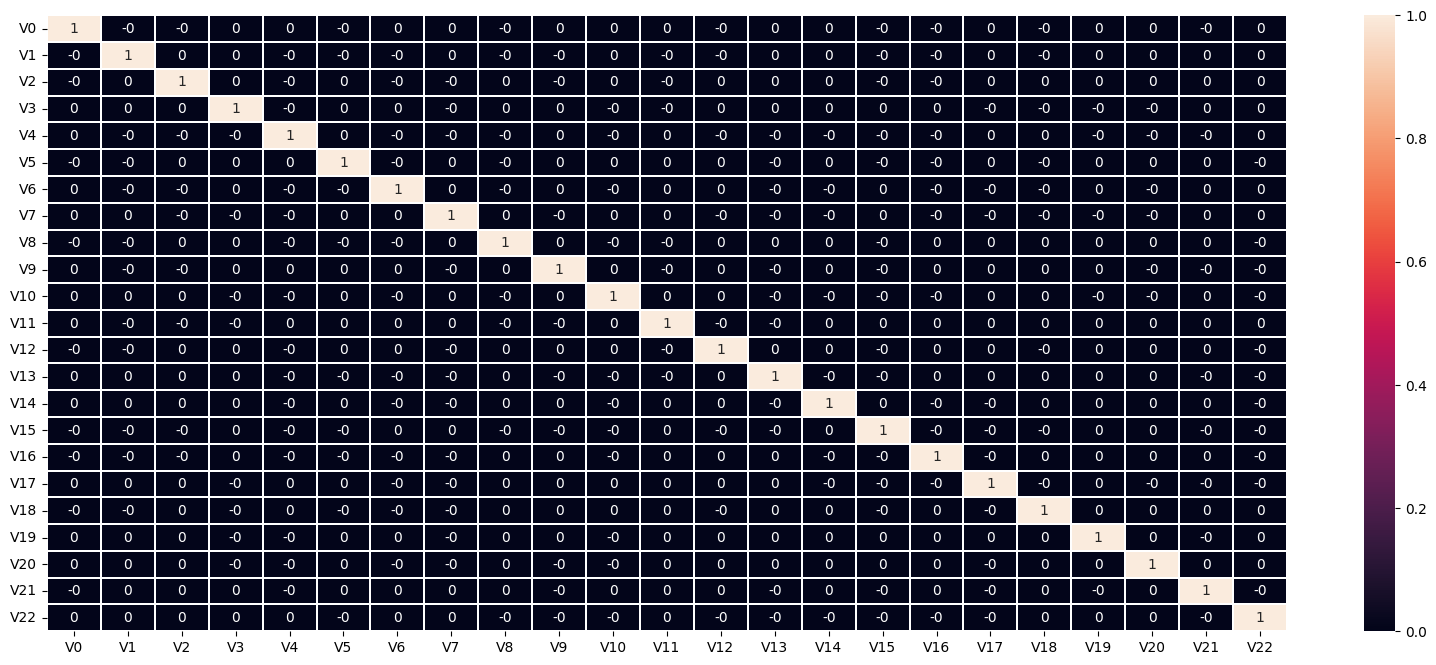

In [44]:
# Korelacja
plt.figure(figsize=[20,8])
sns.heatmap(df_pca.corr().round(1),annot= True,  linewidths=0.1)
plt.show()


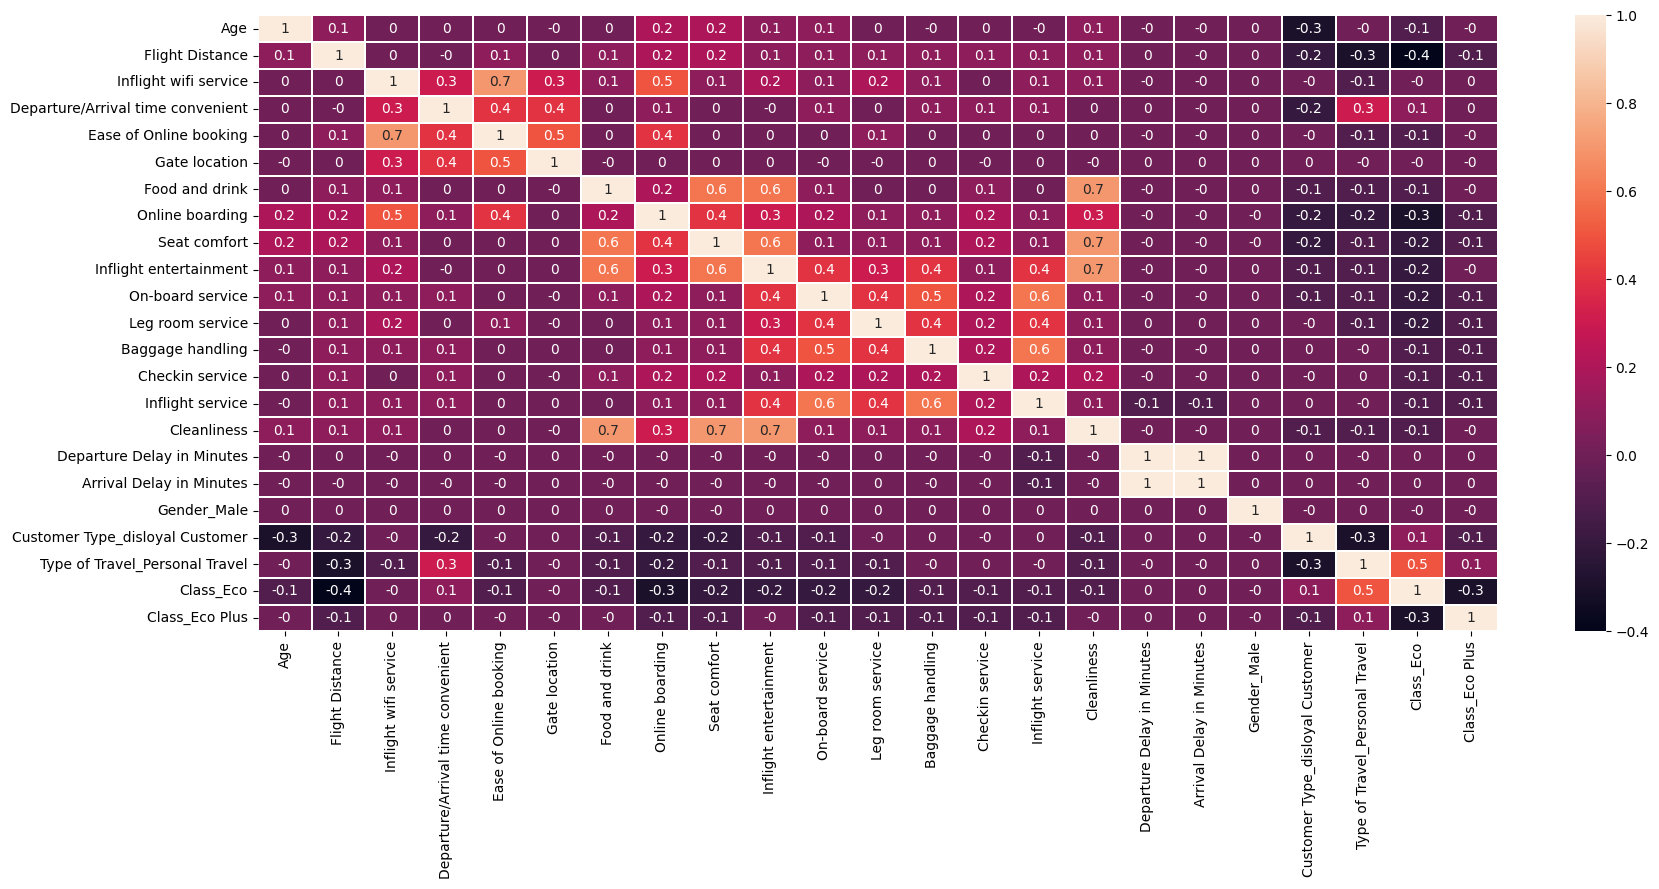

In [45]:
# Korelacja
plt.figure(figsize=[20,8])
sns.heatmap(df_scaled.corr().round(1),annot= True,  linewidths=0.1)
plt.show()

## 5. Porównanie modelu drzewa decyzyjnego na podstawie PCA i zmiennych surowych

In [46]:
# Wytypowanie głównych składowych do modelu
x_names = cols[:7]
x_names

['V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [47]:
# dodanie zmiennej y
df_pca['satisfied'] = y 

In [ ]:
# train/test split
train_x_pca, test_x_pca, train_y_pca, test_y_pca = train_test_split(df_pca[x_names], df_pca['satisfied'], random_state=123)

In [48]:
# train/test split
train_x, test_x, train_y, test_y = train_test_split(df, y, random_state=123)

In [50]:
# model ze zmiennymi PCA
model_pca = DecisionTreeClassifier(max_depth=10, min_samples_split=20).fit(train_x_pca, train_y_pca)

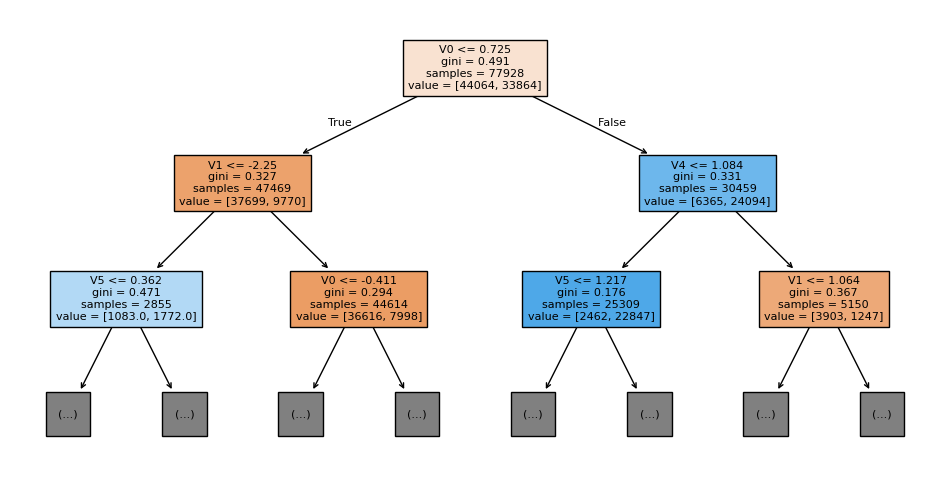

In [51]:
# Rysowanie drzewa
plt.figure(figsize=(12,6))
plot_tree(decision_tree=model_pca,
          filled=True,
          feature_names=model_pca.feature_names_in_, 
          max_depth=2,
          fontsize=8)
plt.show()

In [52]:
# model standardowy
model_std = DecisionTreeClassifier(max_depth=10, min_samples_split=20).fit(train_x, train_y)

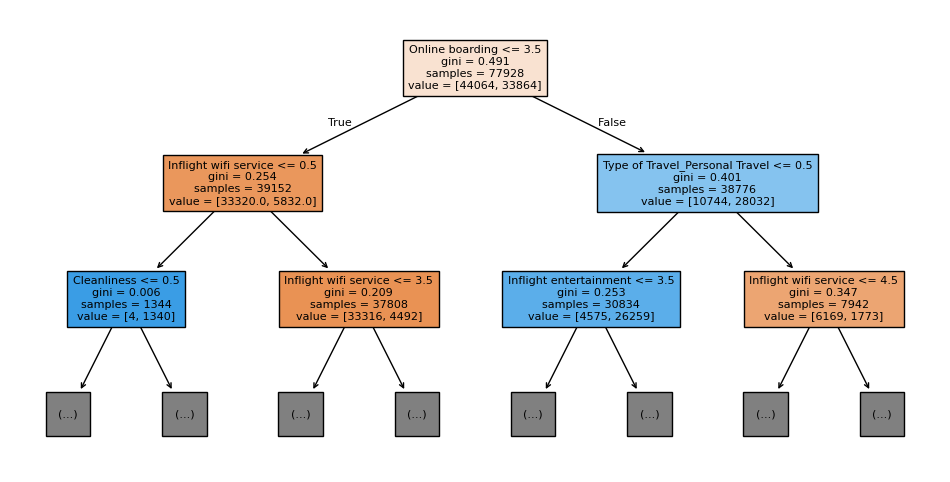

In [53]:
# Rysowanie drzewa
plt.figure(figsize=(12,6))
plot_tree(decision_tree=model_std,
          filled=True,
          feature_names=model_std.feature_names_in_, 
          max_depth=2,
          fontsize=8)
plt.show()

In [54]:
# Accuracy - model PCA test
model_pca.score(test_x_pca, test_y_pca)

0.8905143209116108

In [55]:
# Accuracy - model PCA train
model_pca.score(train_x_pca,train_y_pca)

0.9074786982855969

In [56]:
# Accuracy - model standardowy test
model_std.score(test_x, test_y)

0.9424468740375731

In [57]:
# Accuracy - model standardowy train
model_std.score(train_x,train_y)

0.947143517092701